In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Zad 1.
Zaimplementuj własną funkcje algorytmu k-means (Hartigan).

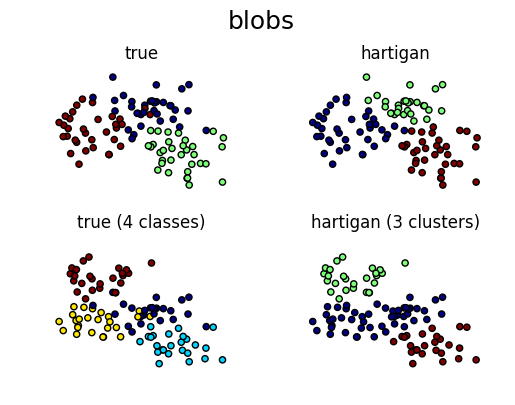

In [67]:
class Hartigan(object):
    
    def __init__(self):
        
        self.labels = None
        self.n_clusters = None
        self.cluster_centers = None
        self.cluster_counts = None
        # self.inertia = ...

    def fit(self, X, initial_labels):
        
        assert(len(X) == len(initial_labels))
        
        self.labels = initial_labels
        self.n_clusters = len(set(self.labels))
        
        self.cluster_centers = np.zeros((self.n_clusters, X.shape[1]))
        self.cluster_counts = np.zeros(self.n_clusters)
        
        n_points = X.shape[0]
        
        # compute initial cluster averages and counts
        for i in range(n_points):
            self.cluster_centers[self.labels[i]] = self.cluster_centers[self.labels[i]] + X[i]
            self.cluster_counts[self.labels[i]] += 1
        for i in range(self.n_clusters):    
            self.cluster_centers[i] = self.cluster_centers[i] / self.cluster_counts[i]
        
        # iterate until no points get shuffled
        change = True
        while change:
            change = False
            
            for i in range(n_points):
                c = self.labels[i]
                x = X[i]
                
                # compute change in energy when switching x to other clusters and pick best
                def delta(k):
                    n = self.cluster_counts[k]
                    return (-1) * n / (n + 1) * np.linalg.norm(x - self.cluster_centers[k])
                deltas = list(map(delta, range(self.n_clusters)))
                # for c need to divide by n/(n-1) instead of n/(n+1)
                deltas[c] = deltas[c] * ((self.cluster_counts[c] + 1) / (self.cluster_counts[c] - 1))
                best = np.argmax(deltas)
                
                # update label, cluster centers and counts
                if best != c:
                    change = True
                    self.labels[i] = best
                    self.cluster_counts[c] -=1
                    self.cluster_counts[best] += 1
                    self.cluster_centers[c] = self.cluster_counts[c] / (self.cluster_counts[c] - 1) * \
                                              self.cluster_centers[c] - 1 / (self.cluster_counts[c] - 1) * x
                    self.cluster_centers[best] = self.cluster_counts[best] / (self.cluster_counts[best] + 1) * \
                                                 self.cluster_centers[best] + 1 / (self.cluster_counts[best] + 1) * x
        return self
    
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
n_classes = len(set(y_blobs))
m = Hartigan().fit(X_blobs, np.random.randint(low=0, high=n_classes, size=X_blobs.shape[0]))

plt.suptitle("blobs" , fontsize=18, verticalalignment='bottom')

plt.subplot(221)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.axis('off')
plt.title("true")

plt.subplot(222)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=m.labels)
plt.axis('off')
_ = plt.title("hartigan")

X_blobs, y_blobs = make_blobs(n_samples=100, centers=4, n_features=2, random_state=0)
m = Hartigan().fit(X_blobs, np.random.randint(low=0, high=3, size=X_blobs.shape[0]))

plt.subplot(223)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.axis('off')
plt.title("true (4 classes)")

plt.subplot(224)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=m.labels)
plt.axis('off')
_ = plt.title("hartigan (3 clusters)")

# Zad 2.
Wykonaj grupowanie na danych iris.

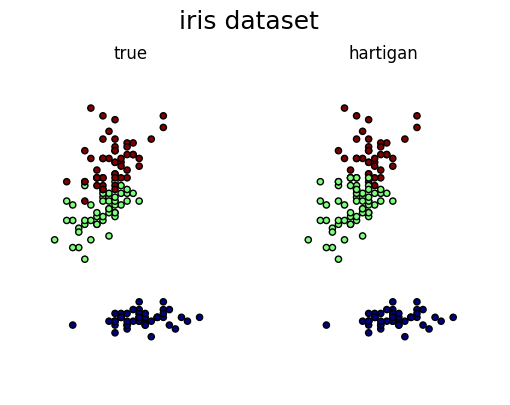

In [101]:
from sklearn import datasets
iris = datasets.load_iris()

X, y = iris.data, iris.target
n_classes = len(set(y))

m = Hartigan().fit(X, np.random.randint(low=0, high=n_classes, size=X.shape[0]))


plt.suptitle("iris dataset", fontsize=18, verticalalignment='bottom')

plt.subplot(121)
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.axis("off")
plt.title("true")

plt.subplot(122)
plt.scatter(X[:, 1], X[:, 2], c=m.labels)
plt.axis("off")
_ = plt.title("hartigan")

# Zad 3.
Wykonaj grupowanie na trzech zbiorach pobranych z repozytorium UCI.

(768, 9)


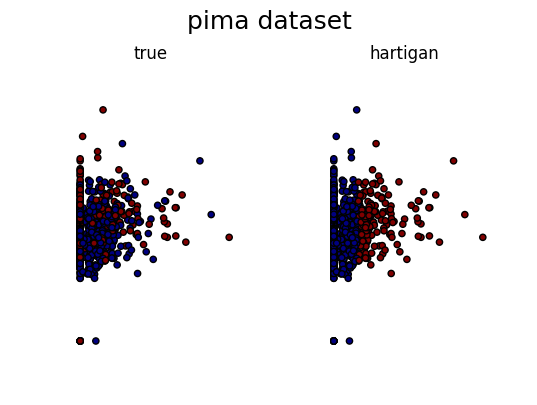

In [84]:
import urllib.request 
url = r"http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")

print(dataset.shape)

X_pima = dataset[:, :8]
y_pima = dataset[:, 8]
n_classes = len(set(y_pima))

m = Hartigan().fit(X_pima, np.random.randint(low=0, high=n_classes, size=X_pima.shape[0]))

plt.suptitle("pima dataset", fontsize=18, verticalalignment='bottom')

plt.subplot(121)
plt.scatter(X_pima[:, 4], X_pima[:, 5], c=y_pima)
plt.axis("off")
plt.title("true")

plt.subplot(122)
plt.scatter(X_pima[:, 4], X_pima[:, 5], c=m.labels)
plt.axis("off")
_ = plt.title("hartigan")

(210, 8)


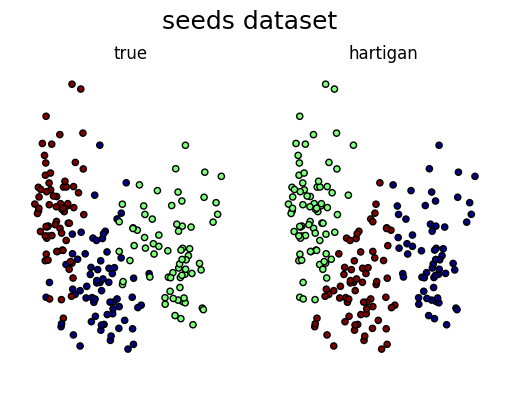

In [102]:
import urllib.request 
url = r"http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data)

print(dataset.shape)

X_seeds = dataset[:, :7]
y_seeds = dataset[:, 7]
n_classes = len(set(y_seeds))

m = Hartigan().fit(X_seeds, np.random.randint(low=0, high=n_classes, size=X_seeds.shape[0]))

plt.suptitle("seeds dataset", fontsize=18, verticalalignment='bottom')

plt.subplot(121)
plt.scatter(X_seeds[:, 0], X_seeds[:, 5], c=y_seeds)
plt.axis("off")
plt.title("true")

plt.subplot(122)
plt.scatter(X_seeds[:, 0], X_seeds[:, 5], c=m.labels)
plt.axis("off")
_ = plt.title("hartigan")

(748, 5)


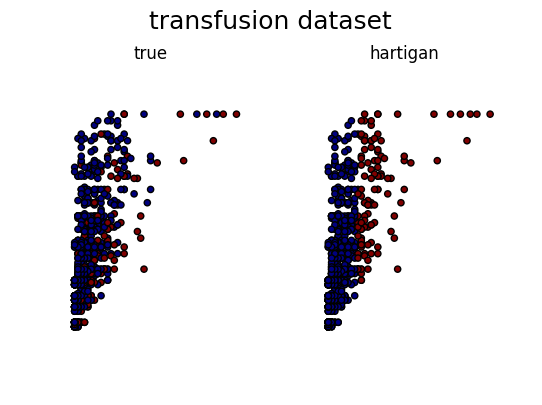

In [103]:
import urllib.request 
url = r"http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",", skiprows=1)

print(dataset.shape)

X_t = dataset[:, :4]
y_t = dataset[:, 4]
n_classes = len(set(y_t))

m = Hartigan().fit(X_t, np.random.randint(low=0, high=n_classes, size=X_t.shape[0]))

plt.suptitle("transfusion dataset", fontsize=18, verticalalignment='bottom')

plt.subplot(121)
plt.scatter(X_t[:, 2], X_t[:, 3], c=y_t)
plt.axis("off")
plt.title("true")

plt.subplot(122)
plt.scatter(X_t[:, 2], X_t[:, 3], c=m.labels)
plt.axis("off")
_ = plt.title("hartigan")